## 課題1

### 関数 $f(x) = x^3 + 2x^2 - 5x + 6$ がある

1. f(x)を -5≦x≦3 で図示せよ。
2. 初期値 $x_0=-3,1$ の二通りにおいて、ニュートン法を用いて $f(x)=0$ となるxを求めよ。


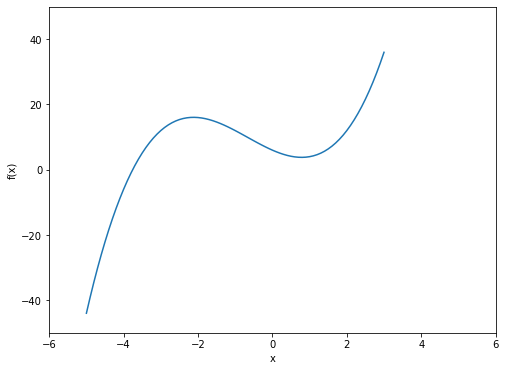

In [1]:
# 課題1-1
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def f(x):
    return x**3 + 2*x**2 - 5*x + 6

# -5≦x≦3
x = np.arange(-5, 3.1, 0.1)

# x**3 + 2*x**2 - 5*x + 6
y = f(x)

fig = plt.figure(figsize=(8,6))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-6, 6)
plt.ylim(-50, 50)
plt.show()

In [4]:
# 課題1-2
import sympy as sym

def newton(x0, dif):
    return x0 - (f(x0)/dif.subs(x, x0))

def calc_newton(x0, dif, th):
    # 不要な初期値のためのカウンター
    count = 0

    while True:
        x1 = newton(x0, dif)
        if abs(f(x1)) < th or count > 10:
            break
        print(float(x1))
        print(float(f(x1)))
        x0 = x1
        count += 1
    return x1, f(x1)

## main
# 初期値
x0_list = [-3, 1]
# 閾値
th = 10e-6
# 探索実行
for x0 in x0_list:
    # x
    x = sym.symbols('x')
    # 微分値
    dif = sym.diff(f(x))
    # ニュートン法
    x, fx = calc_newton(x0, dif, th)
    print("初期値 x0 = {} のニュートン法を用いた f(x) = 0 は\nf(x) = {}\n x = {}\nとなる\n".format(x0, float(fx), float(x)))

-4.2
-11.808
-3.820565552699229
-1.4714599308448448
-3.757971282062912
-0.0368260846507598
-3.7563224877074934
-2.520686419640285e-05
初期値 x0 = -3 のニュートン法を用いた f(x) = 0 は
f(x) = -1.1838062181189844e-11
 x = -3.7563213575872454
となる

-1.0
12.0
1.0
4.0
-1.0
12.0
1.0
4.0
-1.0
12.0
1.0
4.0
-1.0
12.0
1.0
4.0
-1.0
12.0
1.0
4.0
-1.0
12.0
初期値 x0 = 1 のニュートン法を用いた f(x) = 0 は
f(x) = 4.0
 x = 1.0
となる



### 結果

以上より、  
$x = -3.7563213575872454$ であるため、初期値 $x_0 = 3$ は適切である。  
$x = 1.0$ で解が見つからないため、初期値 $x_0 = 1$ は不適切である。

## 課題2
### 関数 $f_1(x) = x_1^2 + x_2^2 - 1 = 0$ , $ f_2(x) = x_1^3 - x_2 $ がある

初期値$(x_1, x_2) = (1, 0.5)$とし、ニュートン法を用いて$f(x) = 0$となる$x$を求めよ。

また、その時の途中解$x_k$と$f_1(x_k), f_2(x_k)$の値も記せ。

終了条件は$f_1(x_k) < 10^-6$ AND $f_2(x_k) < 10^-6$とする。

In [6]:
def f1(x1, x2) :
    return x1**2 + x2**2 - 1

def f2(x1, x2) :
    return x1**3 - x2

def newton_2d(x01, x02, x1, x2):
    # 偏微分式割当
    a = sym.diff(f1(x1, x2), x1)
    b = sym.diff(f1(x1, x2), x2)
    c = sym.diff(f2(x1, x2), x1)
    d = sym.diff(f2(x1, x2), x2) 

    # 一般式
    x0_matrix = np.matrix([[x01], [x02]])
    jacobi_matrix = np.linalg.inv(np.matrix([[float(a.subs(x1, x01)), float(b.subs(x2, x02))], [float(c.subs(x1, x01)), float(d.subs(x2, x02))]]))
    fx_matrix = np.matrix([[f1(x01, x02)], [f2(x01, x02)]])
    a_x1, a_x2 = x0_matrix - jacobi_matrix * fx_matrix

    return float(a_x1), float(a_x2)

def calc_newton_2d(x01, x02, x1, x2, th):
    # 不要な初期値のためのカウンター
    count = 0
    print('途中解')
    while True:
        a_x1, a_x2 = newton_2d(x01, x02, x1, x2)
        print('{}回目'.format(count+1))
        print('x1 = {}\nx2 = {}'.format(a_x1, a_x2))
        print('f1(x1,x2) = {}\nf2(x1,x2) = {}'.format(f1(a_x1,a_x2), f2(a_x1,a_x2)))
        if abs(f1(a_x1, a_x2)) < th and abs(f2(a_x1, a_x2) < th):
            break
        if count > 10:
            break
        x01 = a_x1
        x02 = a_x2
        count += 1

    return a_x1, a_x2, f1(a_x1, a_x2), f2(a_x1, a_x2)

### main
## 初期値
x01 = 1
x02 = 0.5
## 閾値
th = 10e-6
## 探索実行
# x
x1, x2 = sym.symbols('x1, x2')
# ニュートン法
a_x1, a_x2, f1x, f2x = calc_newton_2d(x01, x02, x1, x2, th)
print("\n初期値 (x01,x02) = ({},{}) のニュートン法を用いた f(x) = 0 は\nf1(x1,x2) = {}\nf2(x1,x2) = {}\nx1 = {}\nx2 = {}\nとなる\n".format(x01, x02, float(f1x), float(f2x), float(a_x1), float(a_x2)))

途中解
1回目
x1 = 0.85
x2 = 0.55
f1(x1,x2) = 0.02499999999999991
f2(x1,x2) = 0.06412499999999988
2回目
x1 = 0.8266083124196609
x2 = 0.563423517169615
f1(x1,x2) = 0.0007273618610592614
f2(x1,x2) = 0.001382486917828829
3回目
x1 = 0.826031686465398
x2 = 0.5636240108887777
f1(x1,x2) = 3.726952226834612e-07
f2(x1,x2) = 8.243438434085704e-07

初期値 (x01,x02) = (1,0.5) のニュートン法を用いた f(x) = 0 は
f1(x1,x2) = 3.726952226834612e-07
f2(x1,x2) = 8.243438434085704e-07
x1 = 0.826031686465398
x2 = 0.5636240108887777
となる



### 結果

以上より、
  
$x1 = 0.826031686465398$  
$x2 = 0.5636240108887777$   
  
であるため、初期値$(x_1, x_2) = (1, 0.5)$ は適切である。  